In [1]:
# google colab の場合は、下のコメントをアウトを外す
# ! pip install jaconv  # 日本語を含む文字列の全角・半角変換を行うためのライブラリ
# ! pip install japanize_matplotlib  # matplotlib のグラフで日本語を表示
# ! wget https://github.com/KHiraGit/sudspg_ds/raw/main/ds06_sample_data.xlsx

In [2]:
# 利用する python のライブラリをインポート
import pandas as pd
import openpyxl
import re
import jaconv # 日本語を含む文字列の全角・半角変換を行うためのライブラリ

In [3]:
# 商品名の名寄せを行う関数を作成
# 関数の説明
# jconv.z2h(text) / text の全角文字を半角文字に置換 (ここではアルファベットのみ置換)
# re.sub(pat1, pat2, text) / 商品名(text)中に pat1 があったら pat2 に置換する
# str.upper() / 商品名(str) のアルファベットの小文字を大文字に変換
def nayose(product_name):
    _product_name = jaconv.z2h(product_name, kana=False, digit=True, ascii=True)
    _product_name = re.sub(r'\s+', '', _product_name)
    _product_name = _product_name.upper()
    _product_name = re.sub(r'RED', '赤', _product_name)
    _product_name = re.sub(r'BLACK', '黒', _product_name)
    _product_name = re.sub(r'はさみ', 'ハサミ', _product_name)
    _product_name = re.sub(r'シャーペン', 'シャープペン', _product_name)
    _product_name = re.sub(r'エンピツ', '鉛筆', _product_name)
    return _product_name

In [4]:
df = pd.read_excel('ds06_sample_data.xlsx')

drop_index = []
for index, row in df.iterrows():
    if row['日付'] == '***':
        drop_index.append(index)
    elif row['数量'] == 'N/A' or not (0 < row['数量'] < 10):
        drop_index.append(index)
    else:
        row['商品名'] = nayose(row['商品名'])
        m = re.match(r'7月(\d+)日', row['日付'])
        if m is not None:
            row['日付'] = int(m.group(1))
df.drop(index=drop_index, inplace=True)

df['売上'] = df['単価'] * df['数量']

df.to_excel('ds06_sample_data_mod.xlsx')

In [5]:
def output_product_list(df):
    product_list = []
    for index, row in df.iterrows():
        if row['商品名'] not in product_list:
            product_list.append(row['商品名'])
    for product in product_list:
        print(product)

output_product_list(df)

ボールペン黒
鉛筆
ボールペン赤
ノート
ハサミ
消しゴム
シャープペン


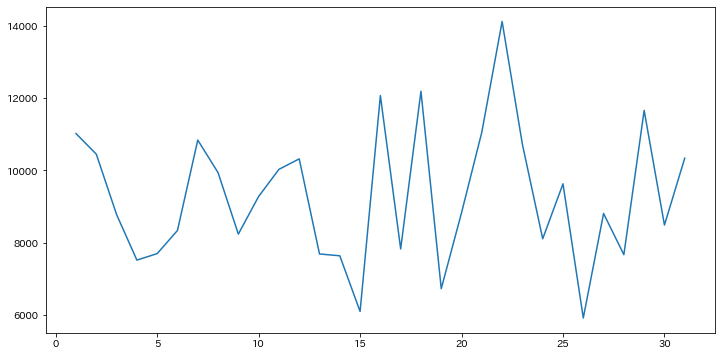

In [6]:
import japanize_matplotlib  # matplotlib のグラフで日本語を表示
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 6))
daily_df = df.groupby('日付').sum()
plt.plot(daily_df.sort_values(by=['日付'])['売上'])

<BarContainer object of 7 artists>

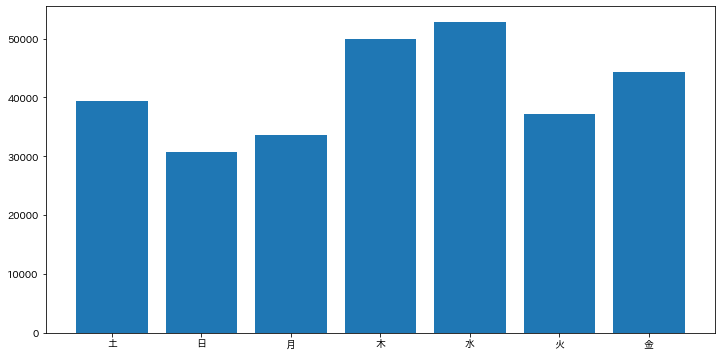

In [7]:
week_df = df.groupby('曜日').sum()
fig = plt.figure(figsize=(12, 6))
plt.bar(week_df.index, week_df['売上'])

<BarContainer object of 7 artists>

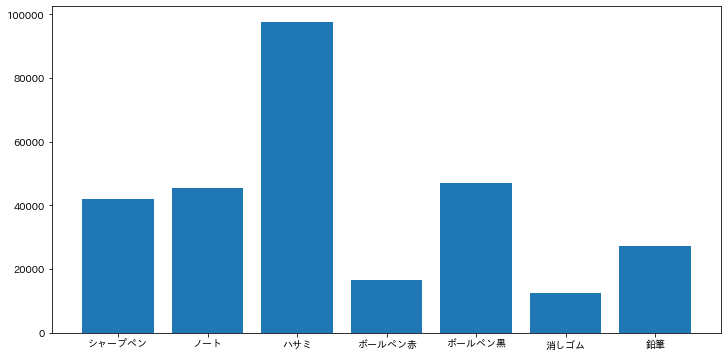

In [8]:
product_df = df.groupby('商品名').sum()
fig = plt.figure(figsize=(12, 6))
plt.bar(product_df.index, product_df['売上'])